In [482]:
import numpy as np
from numpy import fft
import finite 
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_2D_field(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
   
    pcm = ax.pcolormesh(xm, ym, data)
    ax.set_aspect(1)
    fig.colorbar(pcm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.tight_layout()



N = 73
L = 1600E-9


grid_x = finite.UniformNonPeriodicGrid(N,(0,L))
grid_y = finite.UniformNonPeriodicGrid(N,(0,L))
domain = finite.Domain([grid_x, grid_y])
x, y = domain.values()
xm, ym  = np.meshgrid(x, y)

H = np.zeros((N,N))
RHO = np.zeros((N,N))

Hinitial = (1+y-y)*np.sin(x)
H = (1+y-y)*np.sin(x)
RHO = np.sin(y)*np.sin(x)
RHOinitial =  np.sin(y)*np.sin(x)*1E6


Hcoff  = fft.fft2(H,norm='backward')
RHOcoff  = fft.fft2(H,norm='backward')


# q matrix
n= np.arange(0,N)
m = np.arange(0,N)
n = np.matrix(n)
m = np.matrix(m)
m = np.transpose(m)

q = np.square(n)+np.square(m)
q = np.array(q)
q = np.sqrt(q)
q.astype(complex)
q[0,0]=1E-16
q =q/L*2*np.pi



In [483]:
dt = 3.2E-9
nu = 0.02

k=0.07
d=1E-9
mu=1E-8
b=1E7
Tem = 310
Kb= 1.38E-23
KbT = Kb*Tem
kapa = 2*d**2*k+20*KbT
#for stochastic

t=0
T =100*dt
cadence =1
n=0

while t<T:
    Hcoffnew = Hcoff + dt/(4*nu*q)*(-kapa*Hcoff*(q**4)+2*k*d*(q**2)*RHOcoff)
    RHOcoffnew = RHOcoff + (dt*q**2/(4*b+4*nu*q+2*mu*q**2))*(-2*k*d*(q**2)*Hcoff-2*k*RHOcoff)

    for i in range(N):
        for j in range(N):
            Hcoffnew[i,j] = Hcoffnew[i,j]+np.random.normal(0,float((L**2)*(KbT)*dt/(4*nu*q[i,j])),1)
            RHOcoffnew[i,j] = RHOcoffnew[i,j]+np.random.normal(0,float((L**2)*(KbT)*dt*q[i,j]**2/(4*b+4*nu*q[i,j]+2*mu*q[i,j]**2)),1)

    Hcoff = np.copy(Hcoffnew)
    Hcoff[0,0]=1E-16
    RHOcoff = np.copy(RHOcoffnew)
    t += dt
    c = fft.ifft2(Hcoff,norm='backward')
    print(c)



[[-7.58071441e-07+1.57372344e-07j -7.58071441e-07+1.57372344e-07j
  -7.58071441e-07+1.57372344e-07j ... -7.58071441e-07+1.57372344e-07j
  -7.58071441e-07+1.57372344e-07j -7.58071441e-07+1.57372344e-07j]
 [-7.11992286e-07+1.10868412e-07j -7.11992286e-07+1.10868412e-07j
  -7.11992286e-07+1.10868412e-07j ... -7.11992286e-07+1.10868412e-07j
  -7.11992286e-07+1.10868412e-07j -7.11992286e-07+1.10868412e-07j]
 [-6.85564964e-07+8.45396042e-08j -6.85564964e-07+8.45396042e-08j
  -6.85564964e-07+8.45396042e-08j ... -6.85564964e-07+8.45396042e-08j
  -6.85564964e-07+8.45396042e-08j -6.85564964e-07+8.45396042e-08j]
 ...
 [ 6.85564964e-07+8.45396042e-08j  6.85564964e-07+8.45396042e-08j
   6.85564964e-07+8.45396042e-08j ...  6.85564964e-07+8.45396042e-08j
   6.85564964e-07+8.45396042e-08j  6.85564964e-07+8.45396042e-08j]
 [ 7.11992286e-07+1.10868412e-07j  7.11992286e-07+1.10868412e-07j
   7.11992286e-07+1.10868412e-07j ...  7.11992286e-07+1.10868412e-07j
   7.11992286e-07+1.10868412e-07j  7.11992286e-

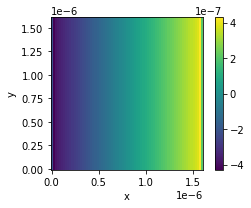

In [484]:
H = fft.ifft2(np.transpose(Hcoff),norm='backward')
H = np.real(H)
RHO = fft.ifft2(np.transpose(RHOcoff),norm='backward')
RHO = np.real(RHO)

plot_2D_field(xm,ym,H)

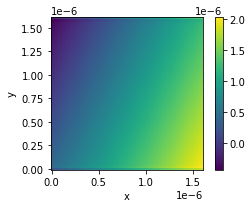

In [485]:
plot_2D_field(xm,ym,np.transpose(Hinitial-H))

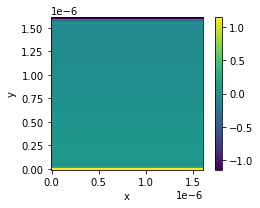

In [488]:
plot_2D_field(xm,ym,np.transpose(RHO))